<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CS/MATH 3414 by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import warnings
import sympy


# Root Finding methods


Our goal in this section is to develop techniques to approximate the roots of a given function $f(x)$. 

## Solving nonlinear systems of equations

For example, suppose that you are trying to find a solution to the equation

$$
    x^2  = \sin{2 x}.
$$

Simply rearranging, the expression can be rewritten in the form

$$
    f(x) =  x^2  -\sin{2 x} = 0.
$$

Determining the roots of the function $f(x)$ is now equivalent to determining the solution to the original expression. Unfortunately, a number of other issues arise. In particular,  with non-linear equations, there may be multiple solutions, or no real solutions at all.

## Relation to optimization 

Some of the methods we learn in this chapter are also useful in solving problems of the form:


$$ \min_x{ |f(x)|} $$ 


### Fixed-point iteration

If we can write $f(x) = 0 $ in an equivalent form as 
$$x = g(x)$$

**Example:**  Solving  $x - e^{-x} = 0 $ we have $g(x) = e^{-x}$ and $x = g(x)$

definition: A **fixed point** of function $g(x)$ is the point $x^\star$ such that $x^\star = g(x^\star)$

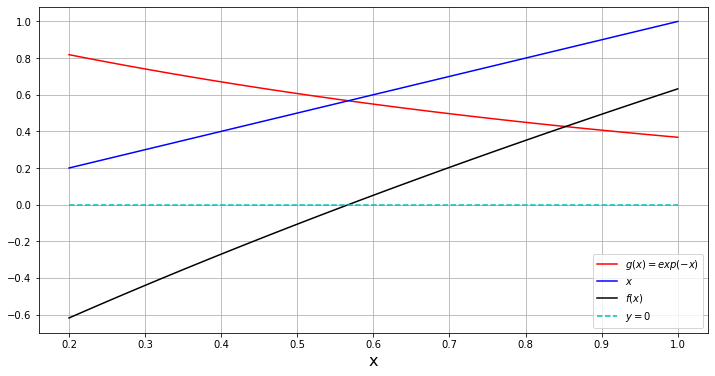

In [19]:
x = numpy.linspace(0.2, 1.0, 100)

fig = plt.figure(figsize=(12,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r',label='$g(x)=exp(-x)$')
axes.plot(x, x, 'b',label='$x$')
axes.plot(x, x-numpy.exp(-x), 'k',label='$f(x)$')


axes.plot(x, 0*x, 'c--',label='$ y=0$')
axes.set_xlabel("x",fontsize=16)
axes.legend()
plt.grid()
plt.show()

#### Consider the iterative scheme

set $x_0$ then compute

$$
\begin{align}
    x_i &= g(x_{i-1})\quad \mathrm{for}\quad i=1,2,3\ldots, \\
    R_i &= |g(x_{i}) - x_i| = |f(x_i)|
\end{align}
$$

	x	      g(x)	    residual
   0.4000000	   0.6703200	   0.2703200
   0.6703200	   0.5115448	   0.1587752
   0.5115448	   0.5995686	   0.0880238
   0.5995686	   0.5490484	   0.0505202
   0.5490484	   0.5774991	   0.0284507
   0.5774991	   0.5613004	   0.0161987


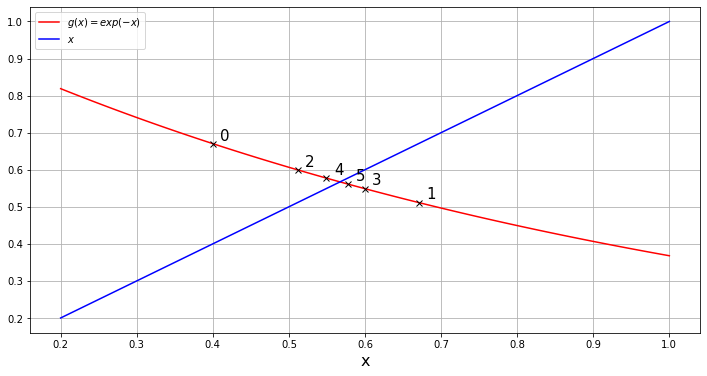

In [46]:
x = numpy.linspace(0.2, 1.0, 100)

fig = plt.figure(figsize=(12,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r',label='$g(x)=exp(-x)$')
axes.plot(x, x, 'b',label='$x$')
axes.set_xlabel("x",fontsize=16)
axes.legend()

x = 0.4
print('\tx\t      g(x)\t    residual')
for steps in range(6):
    axes.plot(x, numpy.exp(-x),'kx')
    axes.text(x+0.01, numpy.exp(-x)+0.01, steps, fontsize="15")
    
    residual = numpy.abs(numpy.exp(-x) - x)
    print("{:12.7f}\t{:12.7f}\t{:12.7f}".format(x, numpy.exp(-x), residual))

    x = numpy.exp(-x)


plt.grid()
plt.show()

### Example:

Let $f(x) = \ln x + x$ and solve $f(x) = 0$ or $x = -\ln x$.

Note that this problem is equivalent to taking the logarithm of $x = e^{-x}$.

	x	      -log(x)	    residual
   0.5500000	   0.5978370	   0.0478370
   0.5978370	   0.5144371	   0.0833999
   0.5144371	   0.6646819	   0.1502448
   0.6646819	   0.4084467	   0.2562352
   0.4084467	   0.8953939	   0.4869472
   0.8953939	   0.1104915	   0.7849024


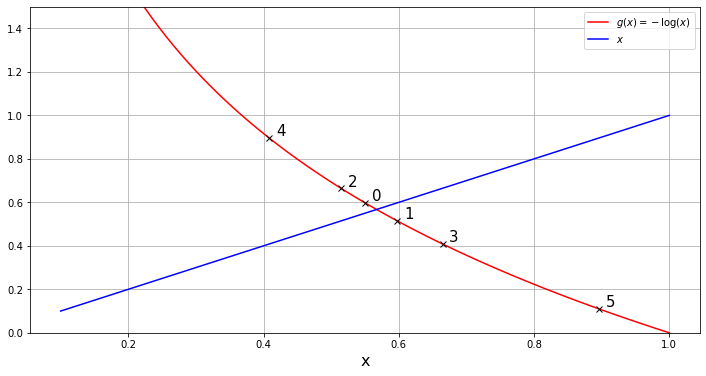

In [47]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure(figsize=(12,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r',label='$g(x)=-\log(x)$')
axes.plot(x, x, 'b',label='$x$')
axes.set_xlabel("x",fontsize=16)
axes.set_ylim([0, 1.5])
axes.legend(loc='best')

x = 0.55
print('\tx\t      -log(x)\t    residual')

for steps in range(6):
    residual = numpy.abs(numpy.log(x) + x)
    print("{:12.7f}\t{:12.7f}\t{:12.7f}".format(x, -numpy.log(x), residual))
    axes.plot(x, -numpy.log(x),'kx')
    axes.text(x + 0.01, -numpy.log(x) + 0.01, steps, fontsize="15")
    x = -numpy.log(x)

plt.grid()    
plt.show()

## Analysis of Fixed Point Iteration

Existence and uniqueness of fixed point problems

**Existence:**

If  $g \in C[a,b]$, and if the range of the mapping $g(x)$ satisfies $ g(x) \in [a, b] \quad \forall x \in [a, b]$ then $g$ has a fixed point in $[a, b]$.

proof: 

If $g(a) = a$  or $g(b)=b$ the existence of fixed point is trivial. Othewise:

$$
g(a) > a, \quad g(b)<b 
$$

then the function $f(x) =  g(x) - x$ chnages sign over $[a,b]$:

$$
f(a) = g(a)-a > 0, \quad f(b) = g(b) - b <0 
$$

From intermediate value theorem and contiounes-ness of f(x) we know that $\exists x^\star \in [a,b]$ such that $f(x^\star) = 0$ and 

$$
g(x^\star ) = x^\star 
$$
is a fixed point.


**Uniqueness:**

If additionally $g'(x)$ is defined on $x \in [a, b]$ and $\exists L < 1$ such that

$$
    |g'(x)| \leq L < 1 \quad \forall x \in (a,b)
$$

then $g$ has a unique fixed point $\in [a,b]$. 

proof by contradiction. If $p$ and $q$ are two distinct fixed points in $[a,b]$ using the mean value thorem, or Lagranges raminder remainder theroem we have that 
$$
\exists \xi \in (a,b), \quad g'(\xi) = \frac{g(p) - g(q)}{p-q}, \\
g'(\xi) = 1
$$
which is a contradiction. 
*

### Convergence of fixed-point iteration

*Asymptotic convergence*: Behavior of fixed point iterations as $k \to \infty$

$$x_{k+1} = g(x_k)$$

Assume that a fixed point $x^\ast$ exists, such that  
$$
x^\ast = g(x^\ast)
$$ 

Then define 
$$
    x_{k+1} = x^\ast + e_{k+1} \quad \quad  x_k = x^\ast + e_k
$$

substituting
$$
    x^\ast + e_{k+1} = g(x^\ast + e_k)
$$

Taylor expand $g(x)$ about $x^\ast$ 

$$
    g(x^\ast + e_k) = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} + O(e_k^3)
$$


from our definition  $$x^\ast + e_{k+1} = g(x^\ast + e_k)$$ we have
$$
    x^\ast + e_{k+1} = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} +  O(e_k^3)
$$

Note that because $x^* = g(x^*)$ these terms cancel leaving

$$e_{k+1} = g'(x^*) e_k + O(e_k^2)$$

So if $|g'(x^*)| =  K < 1$ we can conclude that

$$|e_{k+1}| = K |e_k| +  O(e_k^2)$$

which is convergent. Note that  $|e_{n}| \approx K^n |e_0|$.

### Convergence of iterative schemes

Given any iterative scheme where

$$|e_{k+1}| = C |e_k|^n$$

If $C < 1$ and:
 - $n=1$ then the scheme is **linearly convergent**
 - $n=2$ then the scheme is **quadratically convergent**
 - $n > 1$ the scheme can also be called **superlinearly convergent**

If $C > 1$ then the scheme is **divergent**



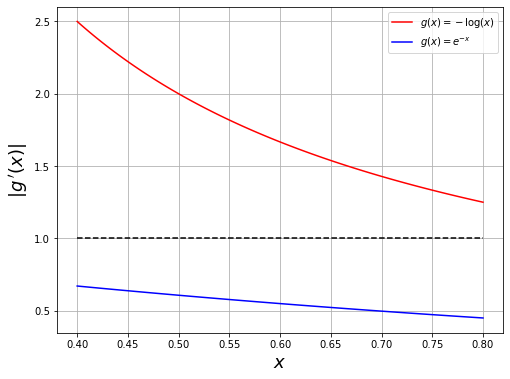

In [48]:
x = numpy.linspace(0.4, 0.8, 100)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, x**(-1), 'r',label='$g(x)=-\log(x)$')
axes.plot(x, numpy.abs(-numpy.exp(-x)), 'b', label='$g(x)=e^{-x}$')
axes.plot(x, numpy.ones(x.shape), 'k--')
axes.set_xlabel("$x$",fontsize=18)
axes.set_ylabel("$|g\,'(x)|$",fontsize=18)
axes.grid()
plt.legend()
plt.show()

### Bracketing and Bisection

A **bracket** is an interval $[a,b]$ that contains exactly one zero or minima/maxima of interest.  

In the case of a zero the bracket should satisfy 
$$
    \text{sign}(f(a)) \neq \text{sign}(f(b)).
$$

In the case of minima or maxima we need 
$$
    \text{sign}(f'(a)) \neq \text{sign}(f'(b))
$$

**Theorem**:  

Let
$$
    f(x) \in C[a,b] \quad \text{and} \quad \text{sign}(f(a)) \neq \text{sign}(f(b))
$$

then there exists a number 
$$
    c \in (a,b) \quad \text{s.t.} \quad f(c) = 0.
$$
(proof uses intermediate value theorem)

Basic bracketing algorithms shrink the bracket while ensuring that the root/extrema remains within the bracket.

What ways could we "shrink" the bracket so that the end points converge to the root/extrema?

#### Bisection Algorithm

Given a bracket $[a,b]$ and a function $f(x)$ - 
1. Initialize with bracket
2. Iterate
   1. Cut bracket in half and check to see where the zero is
   2. Set bracket to new bracket based on what direction we went

##### basic code
```python
def bisection(f,a,b,tol):

    
    for step in range(1, MAX_STEPS + 1):
        
        c = (a + b)/2  
        f_a = f(a)
        f_b = f(b)
        f_c = f(c)
        if numpy.abs(f_c) < tol:
            break
        if numpy.sign(f_a) != numpy.sign(f_c):
            b = c
        else:
            a = c
            
    return c
```

In [16]:
# real code with standard bells and whistles

def bisection(f,a,b,tol = 1.e-6):
    """ uses bisection to isolate a root x of a function of a single variable f such that f(x) = 0.
        the root must exist within an initial bracket a < x < b
        returns when f(x) at the midpoint of the bracket < tol
    
    Parameters:
    -----------
    
    f: function of a single variable f(x) of type float
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f((a+b)/2)| < tol
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    x_array: numpy array
        history of bracket centers (for plotting later)
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    
    """
    MAX_STEPS = 10000-1
    
    # initialize
    delta_x = b - a
    c = a + delta_x / 2.0
    c_array = [ c ]
    
    f_a = f(a)
    f_b = f(b)
    f_c = f(c)
    
    # check bracket
    if numpy.sign(f_a) == numpy.sign(f_b):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")
        
    # Loop until we reach the TOLERANCE or we take MAX_STEPS
    for step in range(1, MAX_STEPS + 1):
        # Check tolerance - Could also check the size of delta_x
        # We check this first as we have already initialized the values
        # in c and f_c
        if numpy.abs(f_c) < tol:
            break

        if numpy.sign(f_a) != numpy.sign(f_c):
            b = c
            f_b = f_c
        else:
            a = c
            f_a = f_c
        delta_x = b - a
        c = a + delta_x / 2.0
        f_c = f(c)
        c_array.append(c)
        
    if step == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return c, numpy.array(c_array)

In [17]:
# set up function as an inline lambda function
P = 1500.0
m = 12
n = 20.0
A = 1e6
f = lambda r: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initialize bracket
a = 0.07
b = 0.10

In [18]:
# find root
r_star, r_array = bisection(f, a, b, tol=1e-8)
print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))

root at r = 0.08985602483470759, f(r*) = -9.080395102500916e-09, 40 steps


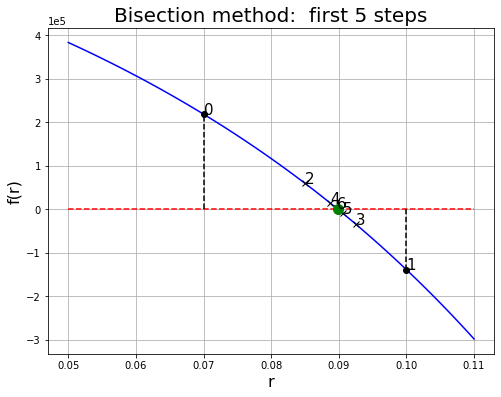

In [19]:
r = numpy.linspace(0.05, 0.11, 100)
# Setup figure to plot convergence
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r", fontsize=16)
axes.set_ylabel("f(r)", fontsize=16)
#axes.set_xlim([0.085, 0.091])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.plot(a, f(a), 'ko')
axes.plot([a, a], [0.0, f(a)], 'k--')
axes.text(a, f(a), str(0), fontsize="15")

axes.plot(b, f(b), 'ko')
axes.plot([b, b], [f(b), 0.0], 'k--')
axes.text(b, f(b), str(1), fontsize="15")
axes.grid()

# plot out the first N steps
N = 5
for k,r in enumerate(r_array[:N]):
    # Plot iteration
    axes.plot(r, f(r),'kx')
    axes.text(r, f(r), str(k + 2), fontsize="15")
    
axes.plot(r_star, f(r_star), 'go', markersize=10)
axes.set_title('Bisection method:  first {} steps'.format(N), fontsize=20)
#axes.set_xscale('log')

plt.show()

What is the smallest tolerance that can be achieved with this routine?  Why?

In [20]:
# find root
r_star, r_array = bisection(f, a, b, tol=1e-15 )
print('root at r = {}, f(r*) = {}, {} steps'.format(r_star,f(r_star),len(r_array)))

root at r = 0.08985602483470556, f(r*) = 3.189779818058014e-08, 10000 steps


<ipython-input-16-8cd6a443a2f8>:71: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')


In [45]:
# this might be useful
print(numpy.diff(r_array))

[ 0.0075   -0.00375   0.001875 ...  0.        0.        0.      ]


#### Convergence of Bisection

Remmeber the error at each iteration is defined as:

$$
    e_{k+1} =  x_{k+1} - x^\ast \quad \quad e_k =  x_k - x^\ast  
$$

Letting $\Delta x_k$ be the width of the $k$th bracket we can then estimate the error with
$$
    e_k \approx \Delta x_k
$$
and therefore
$$
    e_{k+1} \approx \frac{1}{2} \Delta x_k.
$$
Due to the relationship then between $x_k$ and $e_k$ we then know
$$
    |e_{k+1}| = \frac{1}{2} |e_k|
$$
so therefore the method is linearly convergent.

### Newton's Method (Newton-Raphson)
 - Given a bracket, bisection is guaranteed to converge linearly to a root
 - However bisection uses almost no information about $f(x)$ beyond its sign at a point
 - Can we do "better"? <font color='red'>Newton's method</font>, *when well behaved* can achieve quadratic convergence.
 
**Basic Ideas**: There are multiple interpretations we can use to derive Newton's method
* Use Taylor's theorem to estimate a correction to minimize the residual $f(x)=0$ 
* A geometric interpretation that approximates $f(x)$ locally as a straight line to  predict where $x^*$ might be.
* As a special case of a fixed-point iteration

Given current location $x_k$, we have $f(x_k)$ and $f'(x_k)$ and form a line through the point $(x_k, f(x_k))$:

Form equation for the line:

$$y = f'(x_k) x + b$$

Solve for the y-intercept value $b$

$$f(x_k) = f'(x_k) x_k + b$$

$$b = f(x_k) - f'(x_k) x_k$$

and simplify.

$$y = f'(x_k) x + f(x_k) - f'(x_k) x_k$$

$$y = f'(x_k) (x - x_k) + f(x_k)$$

Now find the intersection of our line and the x-axis (i.e. when $y = 0$) and use the resulting value of $x$ to set $x_{k+1}$ 

$$
    0 = f'(x_k) (x_{k+1}-x_k) + f(x_k)
$$

$$
    x_{k+1} = x_k-\frac{f(x_k)}{f'(x_k)}
$$

Perhaps the simplest derivation uses Taylor series.  Consider an initial guess at point $x_k$.  For arbitrary $x_k$, it's unlikely $f(x_k)=0$.  However we can hope there is a correction $\delta_k$ such that at
$$x_{k+1} = x_k + \delta_k$$
and 
$$
    f(x_{k+1}) = 0 
$$

expanding in a Taylor series around point $x_k$ 

$$
    f(x_k + \delta_k) \approx  f(x_k) + f'(x_k) \delta_k  + O(\delta_k^2)
$$

substituting into $f(x_{k+1})=0$ and dropping the higher order terms gives

$$
    f(x_k) + f'(x_k) \delta_k  =0
$$

or solving for the correction
$$
    \delta_k = -f(x_k)/f'(x_k)
$$

which leads to the update for the next iteration
$$
    x_{k+1} = x_k + \delta_k 
$$

or

$$
    x_{k+1} = x_k -f(x_k)/f'(x_k)
$$

rinse and repeat, as it's still unlikely that $f(x_{k+1})=0$ (but we hope the error will be reduced) 

### Algorithm

1. Initialize $x = x_0$
1. While ( $f(x) > tol$ )
  - solve $\delta = -f(x)/f'(x)$
  - update $x \leftarrow x + \delta$


### Geometric interpretation

By truncating the taylor series at first order,  we are locally approximating $f(x)$ as a straight line tangent to the point $f(x_k)$.  If the function was linear at that point, we could find its intercept such that $f(x_k+\delta_k)=0$

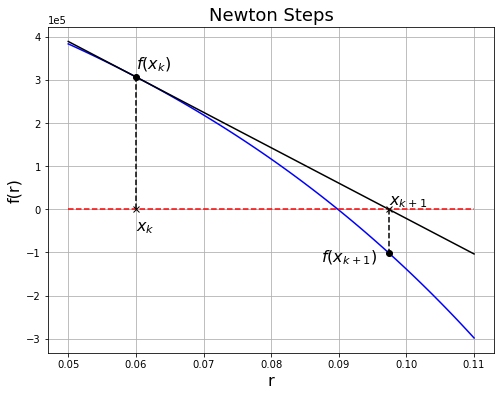

In [21]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Initial guess
x_k = 0.06

# Setup figure to plot convergence
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

# Plot x_k point
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')

axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, -5e4, "$x_k$", fontsize=16)
axes.plot(x_k, 0.0, 'xk')
axes.text(x_k, f(x_k) + 2e4, "$f(x_k)$", fontsize=16)
axes.plot(r, f_prime(x_k) * (r - x_k) + f(x_k), 'k')

# Plot x_{k+1} point
x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, 1e4, "$x_{k+1}$", fontsize=16)
axes.plot(x_k, 0.0, 'xk')
axes.text(0.0873, f(x_k) - 2e4, "$f(x_{k+1})$", fontsize=16)

axes.set_xlabel("r",fontsize=16)
axes.set_ylabel("f(r)",fontsize=16)
axes.set_title("Newton Steps",fontsize=18)
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.grid()

plt.show()

### Some code

In [7]:
def newton(f,f_prime,x0,tol = 1.e-6):
    """ uses newton's method to find a root x of a function of a single variable f
    
    Parameters:
    -----------
    f: function f(x)
        returns type: float
    f_prime: function f'(x)
        returns type: float
    x0: float
        initial guess
    tolerance: float
        Returns when |f(x)| < tol
        
    Returns:
    --------
    x: float
        final iterate
    x_array: numpy array
        history of iteration points
        
    Raises:
    -------
    Warning: 
        if number of iterations exceed MAX_STEPS
    """
    MAX_STEPS = 200
    
    x = x0
    x_array = [ x0 ]
    for k in range(1, MAX_STEPS + 1):
        x = x  - f(x) / f_prime(x)
        x_array.append(x)
        if numpy.abs(f(x)) < tol:
            break
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return x, numpy.array(x_array)

### Set the problem up

In [22]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

### and solve

In [23]:
x0 = 0.06
x, x_array = newton(f, f_prime, x0, tol=1.e-8)
print('x = {}, f(x) = {}, Nsteps = {}'.format(x, f(x), len(x_array)))
print(f_prime(x)*numpy.finfo('float').eps)

x = 0.08985602483470316, f(x) = 5.122274160385132e-09, Nsteps = 6
-2.819760168457753e-09


Text(0.5, 1.0, 'Convergence')

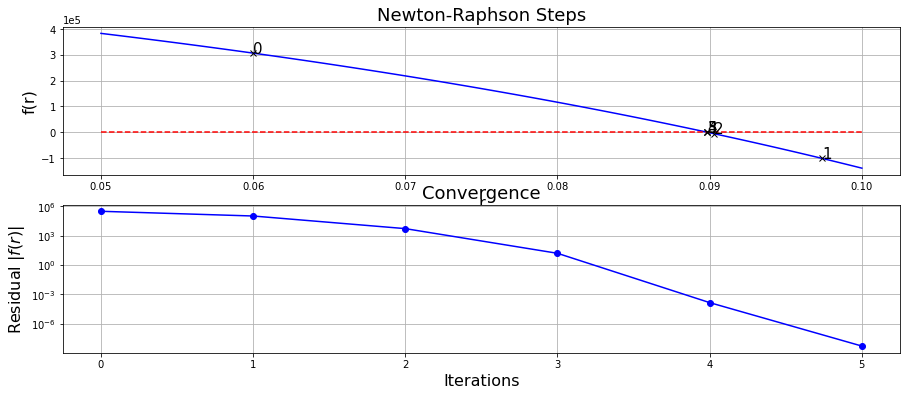

In [29]:
r = numpy.linspace(0.05, 0.10, 100)

# Setup figure to plot convergence
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(2, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

for n, x in enumerate(x_array):
    axes.plot(x, f(x),'kx')
    axes.text(x, f(x), str(n), fontsize="15") 
          
axes.set_xlabel("r", fontsize=16)
axes.set_ylabel("f(r)", fontsize=16)
axes.set_title("Newton-Raphson Steps", fontsize=18)
axes.grid()
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

axes = fig.add_subplot(2, 1, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'bo-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence', fontsize=18)




What is the smallest tolerance that can be achieved with this routine?  Why?

In [31]:
plt.show()

### Example: 

$$f(x) = x - e^{-x}$$

$$f'(x) = 1 + e^{-x}$$

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = x_k - \frac{x_k - e^{-x_k}}{1 + e^{-x_k}}$$


#### setup in sympy

In [10]:
x = sympy.symbols('x') 
f = x - sympy.exp(-x)
f_prime = f.diff(x)
f, f_prime

(x - exp(-x), 1 + exp(-x))

#### and solve

In [11]:
f = sympy.lambdify(x,f)
f_prime = sympy.lambdify(x,f_prime)
x0 = 0.
x, x_array = newton(f, f_prime, x0, tol = 1.e-9)
print('x = {}, f(x) = {}, Nsteps = {}'.format(x, f(x), len(x_array)))

x = 0.5671432904097811, f(x) = -4.440892098500626e-15, Nsteps = 5


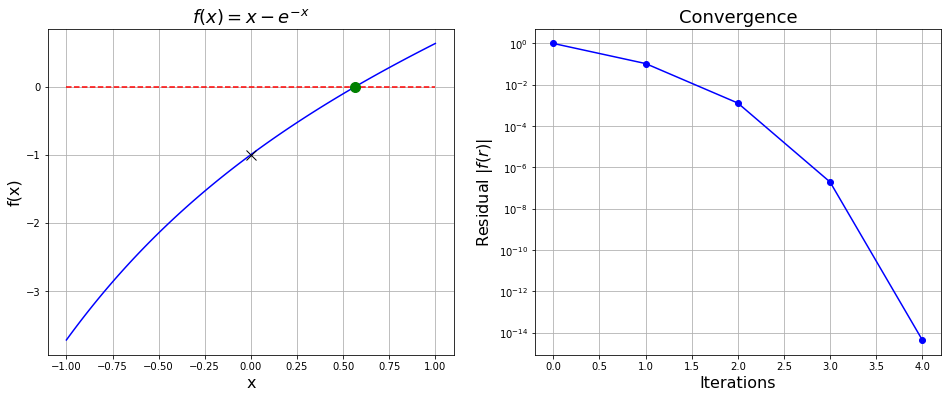

In [12]:
xa = numpy.linspace(-1,1,100)
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1,2,1)
axes.plot(xa,f(xa),'b')
axes.plot(xa,numpy.zeros(xa.shape),'r--')
axes.plot(x,f(x),'go', markersize=10)
axes.plot(x0,f(x0),'kx',markersize=10)
axes.grid()
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_title('$f(x) = x - e^{-x}$', fontsize=18)

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'bo-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence', fontsize=18)

plt.show()

### Asymptotic Convergence of Newton's Method

Newton's method can be also considered a fixed point iteration

$$x_{k+1} = g(x_k)$$

with  $g(x) = x - \frac{f(x)}{f'(x)}$

Again if $x^*$ is the fixed point and $e_k$ the error at iteration $k$:

$$x_{k+1} = x^* + e_{k+1} \quad \quad x_k = x^* + e_k$$

Taylor Expansion around $x^*$

$$
    x^* + e_{k+1} = g(x^* + e_k) = g(x^*) + g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + O(e_k^3)
$$

Note that as before $x^*$ and $g(x^*)$ cancel:

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots$$

What about $g'(x^*)$ though?  

$$\begin{aligned}
    g(x) &= x - \frac{f(x)}{f'(x)} \\
    g'(x) & = 1 - \frac{f'(x)}{f'(x)} + \frac{f(x) f''(x)}{(f'(x))^2} = \frac{f(x) f''(x)}{(f'(x))^2}
\end{aligned}$$

which evaluated at $x = x^*$ becomes

$$
    g'(x^*) = \frac{f(x^*)f''(x^*)}{f'(x^*)^2} = 0
$$

since $f(x^\ast) = 0$ by definition (assuming $f''(x^\ast)$ and $f'(x^\ast)$ are appropriately behaved).

Back to our expansion we have again

$$
    e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots
$$

which simplifies to 

$$
    e_{k+1} = \frac{g''(x^*) e_k^2}{2!} + \ldots
$$

which leads to 
$$
    |e_{k+1}| < \left | \frac{g''(x^*)}{2!} \right | |e_k|^2
$$

Newton's method is therefore quadratically convergent where  the constant is controlled by the second derivative.

#### Example:  Convergence for a non-simple root

Consider our first problem

$$
    f(x) = x^2 + x - \sin(x)
$$

the case is, unfortunately, not as rosey.  Why might this be?

#### Setup the problem

In [ ]:
f = lambda x: x*x + x - numpy.sin(x)
f_prime = lambda x: 2*x + 1. - numpy.cos(x)
x0 = .9

x, x_array = newton(f, f_prime, x0, tol= 1.e-16)
print('x = {}, f(x) = {}, Nsteps = {}'.format(x, f(x), len(x_array)))

In [ ]:
xa = numpy.linspace(-2,2,100)
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1,2,1)
axes.plot(xa,f(xa),'b')
axes.plot(xa,numpy.zeros(xa.shape),'r--')
axes.plot(x,f(x),'go', markersize=10)
axes.plot(x0,f(x0),'kx', markersize=10)
axes.grid()
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_title('$f(x) = x^2 +x - sin(x)$', fontsize=18)

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'bo-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence', fontsize=18)

plt.show()

### Convergence appears linear, can you show this?:
$$f(x) = x^2 + x -\sin (2 \pi x)$$


### Example: behavior of Newton with multiple roots
$f(x) = \sin (2 \pi x)$

$$x_{k+1} = x_k - \frac{\sin (2 \pi x)}{2 \pi \cos (2 \pi x)}= x_k - \frac{1}{2 \pi} \tan (2 \pi x)$$

In [ ]:
x = numpy.linspace(0, 2, 1000)
f = lambda x: numpy.sin(2.0 * numpy.pi * x)
f_prime = lambda x: 2.0 * numpy.pi * numpy.cos(2.0 * numpy.pi * x)
x_kp = lambda x: x - f(x)/f_prime(x)

fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
axes.plot(x, f(x),'b')
axes.plot(x, f_prime(x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $f'(x)$")
axes.set_ylim((-2,2))
axes.set_xlim((0,2))
axes.plot(x, numpy.zeros(x.shape), 'k--')

x_k = 0.3
axes.plot([x_k, x_k], [0.0, f(x_k)], 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x, f_prime(x_k) * (x - x_k) + f(x_k), 'k')

x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')

axes = fig.add_subplot(1, 2, 2)
axes.plot(x, f(x),'b')
axes.plot(x, x_kp(x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $x_{k+1}(x)$",fontsize=18)
axes.set_ylim((-2,2))
axes.set_xlim((0,2))
axes.plot(x, numpy.zeros(x.shape), 'k--')

plt.show()

### Basins of Attraction

Given a point $x_0$ can we determine if Newton-Raphson converges and to **which root** it converges to?

A *basin of attraction* $X$ for Newton's methods is defined as the set such that $\forall x \in X$ Newton iterations converges to the same root.  Unfortunately this is far from a trivial thing to determine and even for simple functions can lead to regions that are complicated or even fractal.  

In [ ]:
# calculate the basin of attraction for f(x) = sin(2\pi x)

x_root = numpy.zeros(x.shape)
N_steps = numpy.zeros(x.shape)
for i,xk in enumerate(x):
    x_root[i], x_root_array = newton(f, f_prime, xk)
    N_steps[i] = len(x_root_array)


In [ ]:
y = numpy.linspace(-2,2)
X,Y = numpy.meshgrid(x,y)
X_root = numpy.outer(numpy.ones(y.shape),x_root)

plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, X_root,vmin=-5, vmax=5,cmap='seismic')
cbar = plt.colorbar()
cbar.set_label('$x_{root}$', fontsize=18)
plt.plot(x, f(x), 'k-')
plt.plot(x, numpy.zeros(x.shape),'k--', linewidth=0.5)
plt.xlabel('x', fontsize=16)
plt.title('Basins of Attraction: $f(x) = \sin{2\pi x}$', fontsize=18)
#plt.xlim(0.25-.1,0.25+.1)
plt.show()

### Fractal Basins of Attraction

If $f(x)$ is complex (for $x$ complex), then the basins of attraction can be beautiful and fractal

Plotted below are two fairly simple equations which demonstrate the issue:
1. $f(x) = x^3 - 1$
2. Kepler's equation $\theta - e \sin \theta = M$

In [ ]:
f = lambda x: x**3 - 1
f_prime = lambda x: 3 * x**2

N = 1001
x = numpy.linspace(-2, 2, N)
X, Y = numpy.meshgrid(x, x)
R = X + 1j * Y

for i in range(30):
    R = R - f(R) / f_prime(R)

roots = numpy.roots([1., 0., 0., -1])
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
axes = fig.add_subplot(1, 1, 1, aspect='equal')
#axes.contourf(X, Y, numpy.sign(numpy.imag(R))*numpy.abs(R),vmin = -10, vmax = 10)
axes.contourf(X, Y, R, vmin = -8, vmax= 8.)
axes.scatter(numpy.real(roots), numpy.imag(roots))
axes.set_xlabel("Real")
axes.set_ylabel("Imaginary")
axes.set_title("Basin of Attraction for $f(x) = x^3 - 1$")
axes.grid()
plt.show()

In [ ]:
def f(theta, e=0.083, M=1):
    return theta - e * numpy.sin(theta) - M
def f_prime(theta, e=0.083):
    return 1 - e * numpy.cos(theta)

N = 1001
x = numpy.linspace(-30.5, -29.5, N)
y = numpy.linspace(-17.5, -16.5, N)
X, Y = numpy.meshgrid(x, y)
R = X + 1j * Y

for i in range(30):
    R = R - f(R) / f_prime(R)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)
axes = fig.add_subplot(1, 1, 1, aspect='equal')    
axes.contourf(X, Y, R, vmin = 0, vmax = 10)
axes.set_xlabel("Real")
axes.set_ylabel("Imaginary")
axes.set_title("Basin of Attraction for $f(x) = x - e \sin x - M$")
plt.show()

#### Other Issues

Need to supply both $f(x)$ and $f'(x)$, could be expensive
 
Example:  FTV equation $f(r) = A - \frac{m P}{r} \left[ \left(1 + \frac{r}{m} \right )^{m n} - 1\right]$

Can use symbolic differentiation (`sympy`)

### Secant Methods

Is there a method with the convergence of Newton's method but without the extra derivatives?  What way would you modify Newton's method so that you would not need $f'(x)$?

Given $x_k$ and $x_{k-1}$ represent the derivative as the approximation

$$f'(x) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$

Combining this with the Newton approach leads to

$$x_{k+1} = x_k - \frac{f(x_k) (x_k - x_{k-1}) }{f(x_k) - f(x_{k-1})}$$

This leads to superlinear convergence and not quite quadratic as the exponent on the convergence is $\approx 1.7$.

Alternative interpretation, fit a line through two points and see where they intersect the x-axis.

$$(x_k, f(x_k)) ~~~~~ (x_{k-1}, f(x_{k-1})$$

$$y = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x - x_k) + b$$

$$b = f(x_{k-1}) - \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x_{k-1} - x_k)$$

$$ y = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x - x_k) + f(x_k)$$

Now solve for $x_{k+1}$ which is where the line intersects the x-axies ($y=0$)

$$0 = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x_{k+1} - x_k) + f(x_k)$$

$$x_{k+1} = x_k - \frac{f(x_k)  (x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$

#### Secant Method

$$x_{k+1} = x_k - \frac{f(x_k)  (x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$

In [ ]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initial guess
x_k = 0.07
x_km = 0.06

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

axes.plot(x_k, 0.0, 'ko')
axes.plot(x_k, f(x_k), 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_km, 0.0, 'ko')
axes.plot(x_km, f(x_km), 'ko')
axes.plot([x_km, x_km], [0.0, f(x_km)], 'k--')

axes.plot(r, (f(x_k) - f(x_km)) / (x_k - x_km) * (r - x_k) + f(x_k), 'k')
x_kp = x_k - (f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km)))
axes.plot(x_kp, 0.0, 'ro')
axes.plot([x_kp, x_kp], [0.0, f(x_kp)], 'r--')
axes.plot(x_kp, f(x_kp), 'ro')

axes.set_xlabel("r", fontsize=16)
axes.set_ylabel("f(r)", fontsize=14)
axes.set_title("Secant Method", fontsize=18)
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.grid()

plt.show()

What would the algorithm look like for such a method?

#### Algorithm

Given $f(x)$,   a `TOLERANCE`, and a `MAX_STEPS` 

1. Initialize two points $x_0$, $x_1$, $f_0 = f(x_0)$, and $f_1 = f(x_1)$
2. Loop for k=2, to  `MAX_STEPS` is reached or `TOLERANCE` is achieved
   1. Calculate new update 
   $$x_{2} = x_1 - \frac{f(x_1)  (x_1 - x_{0})}{f(x_1) - f(x_{0})}$$
   2. Check for convergence and break if reached
   3. Update parameters $x_0 = x_1$, $x_1 = x_{2}$, $f_0 = f_1$ and $f_1 = f(x_1)$

#### Some Code


In [ ]:
def secant(f, x0, x1, tol = 1.e-6):
    """ uses a linear secant method to find a root x of a function of a single variable f
    
    Parameters:
    -----------
    f: function f(x)
        returns type: float
    x0: float
        first point to initialize the algorithm
    x1: float
        second point to initialize the algorithm x1 != x0        
    tolerance: float
        Returns when |f(x)| < tol
        
    Returns:
    --------
    x: float
        final iterate
    x_array: numpy array
        history of iteration points
        
    Raises:
    -------
    ValueError:
        if x1 is too close to x0
    Warning: 
        if number of iterations exceed MAX_STEPS
    """
    MAX_STEPS = 200
    
    if numpy.isclose(x0, x1):
        raise ValueError('Initial points are too close (preferably should be a bracket)')
        
    x_array = [ x0, x1 ]
    for k in range(1, MAX_STEPS + 1):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x_array.append(x2)
        if numpy.abs(f(x2)) < tol:
            break
        x0 = x1
        x1 = x2
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return x2, numpy.array(x_array)

### Set the problem up

In [ ]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)


### and solve

In [ ]:
x0 = 0.06
x1 = 0.07

x, x_array = secant(f, x0, x1, tol= 1.e-7)
print('x = {}, f(x) = {}, Nsteps = {}'.format(x, f(x), len(x_array)))

In [ ]:
r = numpy.linspace(0.05, 0.10, 100)

# Setup figure to plot convergence
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 2, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

for n, x in enumerate(x_array):
    axes.plot(x, f(x),'kx')
    axes.text(x, f(x), str(n), fontsize="15") 
          
axes.set_xlabel("r", fontsize=16)
axes.set_ylabel("f(r)", fontsize=16)
axes.set_title("Secant Method Steps", fontsize=18)
axes.grid()
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

axes = fig.add_subplot(1, 2, 2)
axes.semilogy(numpy.arange(len(x_array)), numpy.abs(f(x_array)), 'bo-')
axes.grid()
axes.set_xlabel('Iterations', fontsize=16)
axes.set_ylabel('Residual $|f(r)|$', fontsize=16)
axes.set_title('Convergence', fontsize=18)

plt.show()

#### Comments

 - Secant method as shown is equivalent to linear interpolation
 - Can use higher order interpolation for higher order secant methods
 - Convergence is not quite quadratic
 - Not guaranteed to converge
 - Does not preserve brackets
 - Almost as good as Newton's method if your initial guess is good.

### Hybrid Methods

Combine attributes of methods with others to make one great algorithm to rule them all (not really)

#### Goals
1. Robustness:  Given a bracket $[a,b]$, maintain bracket
1. Efficiency:  Use superlinear convergent methods when possible

#### Options
 - Methods requiring $f'(x)$
   - NewtSafe (RootSafe, Numerical Recipes)
   - Newton's Method within a bracket, Bisection otherwise
 - Methods not requiring $f'(x)$
   - Brent's Algorithm (zbrent, Numerical Recipes)
     - Combination of bisection, secant and inverse quadratic interpolation
   - `scipy.optimize` package

In [ ]:
from scipy.optimize import brentq
a = 0.07
b = 0.1
x, res  = brentq(f, a, b, full_output=True)
print('x = {}, f(x) = {}'.format(x, f(x)))
print(res)
#brentq?

## Optimization (finding extrema)

I want to find the extrema of a function $f(x)$ on a given interval $[a,b]$.

A few approaches:
 - Interpolation Algorithms: Repeated parabolic interpolation
 - Bracketing Algorithms:  Golden-Section Search (linear)
 - Hybrid Algorithms 

### Interpolation Approach

Successive parabolic interpolation - similar to secant method

Basic idea:  Fit polynomial to function using three points, find its minima, and guess new points based on that minima

1. What do we need to fit a polynomial $p_n(x)$ of degree $n \geq 2$?

2. How do we construct the polynomial $p_2(x)$?

3. Once we have constructed $p_2(x)$ how would we find the minimum?

#### Algorithm

Given $f(x)$ and $[x_0,x_1]$ - Note that unlike a bracket these will be a sequence of better approximations to the minimum.
1. Initialize $x = [x_0, x_1, (x_0+x_1)/2]$
1. Loop
   1. Evaluate function $f(x)$ at the three points
   1. Find the quadratic polynomial that interpolates those points: 
   
      $$p(x) = p_0 x^2 + p_1 x + p_2$$

   3. Calculate the minimum: 
      
      $$p'(x) = 2 p_0 x + p_1 = 0 \quad \Rightarrow \quad x^\ast = -p_1 / (2 p_0)$$

   1. New set of points $x = [x_1, (x_0+x_1)/2, x^\ast]$
   1. Check tolerance

In [ ]:
def f(t):
    """Simple function for minimization demos"""
    return -3.0 * numpy.exp(-(t - 0.3)**2 / (0.1)**2) \
           +      numpy.exp(-(t - 0.6)**2 / (0.2)**2) \
           +      numpy.exp(-(t - 1.0)**2 / (0.2)**2) \
           +      numpy.sin(t)                        \
           -      2.0

In [ ]:
MAX_STEPS = 100
TOLERANCE = 1e-4

x = numpy.array([0.5, 0.2, (0.7) / 2.0])

t = numpy.linspace(0, 2, 200)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")
axes.plot(x[0], f(x[0]), 'ko')
axes.plot(x[1], f(x[1]), 'ko')

success = False
for n in range(1, MAX_STEPS + 1):
    axes.plot(x[2], f(x[2]), 'ko')
    poly = numpy.polyfit(x, f(x), 2)
    axes.plot(t, poly[0] * t**2 + poly[1] * t + poly[2], 'r--')
    x[0] = x[1]
    x[1] = x[2]
    x[2] = -poly[1] / (2.0 * poly[0])
    if numpy.abs(x[2] - x[1]) / numpy.abs(x[2]) < TOLERANCE:
        success = True
        break
    
if success:
    print("Success!")
    print("  t* = %s" % x[2])
    print("  f(t*) = %s" % f(x[2]))
    print("  number of steps = %s" % n)
else:
    print("Reached maximum number of steps!")
    
axes.set_ylim((-5, 0.0))
axes.grid()
plt.show()

#### Some Code


In [ ]:
def parabolic_interpolation(f, bracket, tol = 1.e-6):
    """ uses repeated parabolic interpolation to refine a local minimum of a function f(x)
    this routine uses numpy functions polyfit and polyval to fit and evaluate the quadratics
    
    Parameters:
    -----------
    f: function f(x)
        returns type: float
    bracket: array
        array [x0, x1] containing an initial bracket that contains a minimum   
    tolerance: float
        Returns when relative error of last two iterates < tol 
        
    Returns:
    --------
    x: float
        final estimate of the minima
    x_array: numpy array
        history of iteration points
        
    Raises:
    -------
    Warning: 
        if number of iterations exceed MAX_STEPS
    """
    MAX_STEPS = 100
    
    x = numpy.zeros(3)
    x[:2] = bracket
    x[2] = (x[0] + x[1])/2.
        
    x_array = [ x[2] ]
    for k in range(1, MAX_STEPS + 1):
        poly = numpy.polyfit(x, f(x), 2)
        x[0] = x[1]
        x[1] = x[2]
        x[2] = -poly[1] / (2.0 * poly[0])
        x_array.append(x[2])
        if numpy.abs(x[2] - x[1]) / numpy.abs(x[2]) < tol:
            break
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return x[2], numpy.array(x_array)

#### set up problem


In [ ]:
bracket = numpy.array([0.5, 0.2])
x, x_array = parabolic_interpolation(f, bracket, tol = 1.e-6)
print("Extremum f(x) = {}, at x = {}, N steps = {}".format(f(x), x, len(x_array)))

In [ ]:
t = numpy.linspace(0, 2, 200)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.plot(x_array, f(x_array),'ro')
axes.plot(x, f(x), 'go')
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")
axes.grid()
plt.show()

### Bracketing Algorithm (Golden Section Search)

Given $f(x) \in C[x_0,x_3]$ that is convex (concave) over an interval $x \in [x_0,x_3]$ reduce the interval size until it brackets the minimum (maximum).

Note that we no longer have the $x=0$ help we had before so bracketing and doing bisection is a bit trickier in this case.  In particular choosing your initial bracket is important!

#### Bracket Picking

Say we start with a bracket $[x_0, x_3]$ and pick two new points $x_1 < x_2 \in [x_0, x_3]$.  We want to pick a new bracket that guarantees that the extrema exists in it.  We then can pick this new bracket with the following rules:
 - If $f(x_1) < f(x_2)$ then we know the minimum is between $x_0$ and $x_2$.
 - If $f(x_1) > f(x_2)$ then we know the minimum is between $x_1$ and $x_3$.

In [ ]:
f = lambda x: x**2

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)

search_points = [-1.0, -0.5, 0.75, 1.0]
axes = fig.add_subplot(2, 2, 1)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) < f(x_2) \Rightarrow [x_0, x_2]$")

search_points = [-1.0, -0.75, 0.5, 1.0]
axes = fig.add_subplot(2, 2, 2)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) > f(x_2) \Rightarrow [x_1, x_3]$")

search_points = [-1.0, 0.25, 0.75, 1.0]
axes = fig.add_subplot(2, 2, 3)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) < f(x_2) \Rightarrow [x_0, x_2]$")

search_points = [-1.0, -0.75, -0.25, 1.0]
axes = fig.add_subplot(2, 2, 4)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) > f(x_2) \Rightarrow [x_1, x_3]$")

plt.show()

#### Picking Brackets and Points

Again say we have a bracket $[x_0,x_3]$ and suppose we have two new search points $x_1$ and $x_2$ that separates $[x_0,x_3]$ into two new overlapping brackets.

Define:  the length of the line segments in the interval
\begin{aligned}
    a &= x_1 - x_0, \\
    b &= x_2 - x_1,\\
    c &= x_3 - x_2 \\
\end{aligned}
and the total bracket length
\begin{aligned}
    d &= x_3 - x_0. \\
\end{aligned}

In [ ]:
f = lambda x: (x - 0.25)**2 + 0.5
phi = (numpy.sqrt(5.0) - 1.) / 2.0

x = [-1.0, None, None, 1.0]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
t = numpy.linspace(-2.0, 2.0, 100)
axes.plot(t, f(t), 'k')
# First set of intervals
axes.plot([x[0], x[1]], [0.0, 0.0], 'g',label='a')
axes.plot([x[1], x[2]], [0.0, 0.0], 'r', label='b')
axes.plot([x[2], x[3]], [0.0, 0.0], 'b', label='c')
axes.plot([x[0], x[3]], [2.5, 2.5], 'c', label='d')

axes.plot([x[0], x[0]], [0.0, f(x[0])], 'g--')
axes.plot([x[1], x[1]], [0.0, f(x[1])], 'g--')
axes.plot([x[1], x[1]], [0.0, f(x[1])], 'r--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'r--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'b--')
axes.plot([x[3], x[3]], [0.0, f(x[3])], 'b--')
axes.plot([x[0], x[0]], [2.5, f(x[0])], 'c--')
axes.plot([x[3], x[3]], [2.5, f(x[3])], 'c--')

points = [ (x[0] + x[1])/2., (x[1] + x[2])/2., (x[2] + x[3])/2., (x[0] + x[3])/2. ]
y      = [ 0., 0., 0., 2.5]
labels = [ 'a', 'b', 'c', 'd']

for (n, point)  in enumerate(points):
    axes.text(point, y[n] + 0.1, labels[n], fontsize=15)

for (n, point) in enumerate(x):
    axes.plot(point, f(point), 'ok')
    axes.text(point, f(point)+0.1, n, fontsize='15')
    
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_ylim((-1.0, 3.0))


plt.show()

For **Golden Section Search** we require two conditions:
 - The two new possible brackets are of equal length.  i.e $[x_0, x_2] =  [x_1, x_3]$ or
 
 $$
     a + b = b + c
 $$
 
 or simply $a = c$

In [ ]:
f = lambda x: (x - 0.25)**2 + 0.5
phi = (numpy.sqrt(5.0) - 1.) / 2.0

x = [-1.0, None, None, 1.0]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
t = numpy.linspace(-2.0, 2.0, 100)
axes.plot(t, f(t), 'k')
# First set of intervals
axes.plot([x[0], x[1]], [0.0, 0.0], 'g',label='a')
axes.plot([x[1], x[2]], [0.0, 0.0], 'r', label='b')
axes.plot([x[2], x[3]], [0.0, 0.0], 'b', label='c')
axes.plot([x[0], x[3]], [2.5, 2.5], 'c', label='d')

axes.plot([x[0], x[0]], [0.0, f(x[0])], 'g--')
axes.plot([x[1], x[1]], [0.0, f(x[1])], 'g--')
axes.plot([x[1], x[1]], [0.0, f(x[1])], 'r--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'r--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'b--')
axes.plot([x[3], x[3]], [0.0, f(x[3])], 'b--')
axes.plot([x[0], x[0]], [2.5, f(x[0])], 'c--')
axes.plot([x[3], x[3]], [2.5, f(x[3])], 'c--')

points = [ (x[0] + x[1])/2., (x[1] + x[2])/2., (x[2] + x[3])/2., (x[0] + x[3])/2. ]
y      = [ 0., 0., 0., 2.5]
labels = [ 'a', 'b', 'c', 'd']

for (n, point)  in enumerate(points):
    axes.text(point, y[n] + 0.1, labels[n], fontsize=15)

for (n, point) in enumerate(x):
    axes.plot(point, f(point), 'ok')
    axes.text(point, f(point)+0.1, n, fontsize='15')
    
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_ylim((-1.0, 3.0))


plt.show()

 
 - The ratio of segment lengths is the same for every level of recursion so the problem is self-similar i.e.
 
 $$
     \frac{b}{a} = \frac{c}{a + b}
 $$
 
 These two requirements will allow maximum reuse of previous points and require adding only one new point $x^*$ at each iteration.

In [ ]:
f = lambda x: (x - 0.25)**2 + 0.5
phi = (numpy.sqrt(5.0) - 1.) / 2.0

x = [-1.0, None, None, 1.0]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))
t = numpy.linspace(-2.0, 2.0, 100)
for i in range(2):
    axes[i].plot(t, f(t), 'k')

    # First set of intervals
    axes[i].plot([x[0], x[2]], [0.0, 0.0], 'g')
    axes[i].plot([x[1], x[3]], [-0.2, -0.2], 'r')
    axes[i].plot([x[0], x[0]], [0.0, f(x[0])], 'g--')
    axes[i].plot([x[2], x[2]], [0.0, f(x[2])], 'g--')
    axes[i].plot([x[1], x[1]], [-0.2, f(x[1])], 'r--')
    axes[i].plot([x[3], x[3]], [-0.2, f(x[3])], 'r--')
    for (n, point) in enumerate(x):
        axes[i].plot(point, f(point), 'ok')
        axes[i].text(point, f(point)+0.1, n, fontsize='15')

    axes[i].set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
    axes[i].set_ylim((-1.0, 3.0))

# Left new interval
x_new = [x[0], None, x[1], x[2]]
x_new[1] = phi * (x[1] - x[0]) + x[0]

#axes[0].plot([x_new[0], x_new[2]], [1.5, 1.5], 'b')
#axes[0].plot([x_new[1], x_new[3]], [1.75, 1.75], 'c')
#axes[0].plot([x_new[0], x_new[0]], [1.5, f(x_new[0])], 'b--')
#axes[0].plot([x_new[2], x_new[2]], [1.5, f(x_new[2])], 'b--')
#axes[0].plot([x_new[1], x_new[1]], [1.75, f(x_new[1])], 'c--')
#axes[0].plot([x_new[3], x_new[3]], [1.75, f(x_new[3])], 'c--')
axes[0].plot(x_new[1], f(x_new[1]), 'ko')
axes[0].text(x_new[1], f(x_new[1]) + 0.1, "*", fontsize='15')
for i in range(4):
    axes[0].text(x_new[i], -0.5, i, color='g',fontsize='15')

    
# Right new interval
x_new = [x[1], x[2], None, x[3]]
x_new[2] = (x[2] - x[1]) * phi + x[2]

#axes[1].plot([x_new[0], x_new[2]], [1.25, 1.25], 'b')
#axes[1].plot([x_new[1], x_new[3]], [1.5, 1.5], 'c')
#axes[1].plot([x_new[0], x_new[0]], [1.25, f(x_new[0])], 'b--')
#axes[1].plot([x_new[2], x_new[2]], [1.25, f(x_new[2])], 'b--')
#axes[1].plot([x_new[1], x_new[1]], [1.5, f(x_new[2])], 'c--')
#axes[1].plot([x_new[3], x_new[3]], [1.5, f(x_new[3])], 'c--')
axes[1].plot(x_new[2], f(x_new[2]), 'ko')
axes[1].text(x_new[2], f(x_new[2]) + 0.1, "*", fontsize='15')
for i in range(4):
    axes[1].text(x_new[i], -0.5, i, color='r',fontsize='15')
axes[0].set_title('Choose left bracket', fontsize=18)
axes[1].set_title('Choose right bracket', fontsize=18)


plt.show()

As the first rule implies that $a = c$,  we can substitute into the second rule to yield

$$
     \frac{b}{a} = \frac{a}{a + b}
$$

or inverting and rearranging 
$$
    \frac{a}{b} = 1 + \frac{b}{a}
$$

if we let the ratio $b/a = x$,  then 
$$
    x + 1 = \frac{1}{x} \quad \text{or} \quad x^2 + x - 1 = 0
$$

$$
     x^2 + x - 1 = 0
$$
has a single positive root for 
$$
    x = \frac{\sqrt{5} - 1}{2} = \varphi = 0.6180339887498949
$$
where $\varphi$ is related to the  "golden ratio" (which in most definitions is given by $1+\varphi$, but either work as $ 1+\varphi = 1/\varphi $ )

Subsequent proportionality implies that the distances between the 4 points at one iteration is proportional to the next.  We can now use all of our information to find the points $x_1$ and $x_2$ given any overall bracket $[x_0, x_3]$

Given $b/a = \varphi$,   $a = c$, and the known width of the bracket $d$ it follows that

$$ d = a + b + c = (2 + \phi)a $$
or 
$$ a = \frac{d}{2 + \varphi} = \frac{\varphi}{1 + \varphi} d$$
by the rather special properties of $\varphi$. 

We could use this result immediately to find 

\begin{align}
    x_1 &= x_0 + a \\
    x_2 &= x_3 - a \\
\end{align}

Equivalently, you can show that 

$$a + b = (1 + \varphi)a = \varphi d$$

so

\begin{align}
    x_1 &= x_3 - \varphi d \\
    x_2 &= x_0 + \varphi d \\
\end{align}

In [ ]:
f = lambda x: (x - 0.25)**2 + 0.5
phi = (numpy.sqrt(5.0) - 1.) / 2.0

x = [-1.0, None, None, 1.0]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
t = numpy.linspace(-2.0, 2.0, 100)
axes.plot(t, f(t), 'k')
# First set of intervals
axes.plot([x[0], x[1]], [0.0, 0.0], 'g',label='a')
axes.plot([x[1], x[2]], [0.0, 0.0], 'r', label='b')
axes.plot([x[2], x[3]], [0.0, 0.0], 'b', label='c')
axes.plot([x[0], x[3]], [2.5, 2.5], 'c', label='d')

axes.plot([x[0], x[0]], [0.0, f(x[0])], 'g--')
axes.plot([x[1], x[1]], [0.0, f(x[1])], 'g--')
axes.plot([x[1], x[1]], [0.0, f(x[1])], 'r--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'r--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'b--')
axes.plot([x[3], x[3]], [0.0, f(x[3])], 'b--')
axes.plot([x[0], x[0]], [2.5, f(x[0])], 'c--')
axes.plot([x[3], x[3]], [2.5, f(x[3])], 'c--')

points = [ (x[0] + x[1])/2., (x[1] + x[2])/2., (x[2] + x[3])/2., (x[0] + x[3])/2. ]
y      = [ 0., 0., 0., 2.5]
labels = [ 'a', 'b', 'c', 'd']

for (n, point)  in enumerate(points):
    axes.text(point, y[n] + 0.1, labels[n], fontsize=15)

for (n, point) in enumerate(x):
    axes.plot(point, f(point), 'ok')
    axes.text(point, f(point)+0.1, n, fontsize='15')
    
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_ylim((-1.0, 3.0))


plt.show()

#### Algorithm
1. Initialize bracket $[x_0,x_3]$
1. Initialize points $x_1 = x_3 - \varphi (x_3 - x_0)$ and $x_2 = x_0 + \varphi (x_3 - x_0)$
1. Loop
   1. Evaluate $f_1$ and $f_2$
   1. If $f_1 < f_2$ then we pick the left interval for the next iteration
   1. and otherwise pick the right interval
   1. Check size of bracket for convergence $x_3 - x_0 <$ `TOLERANCE`
   1. calculate the appropriate new point $x^*$ ($x_1$ on left, $x_2$ on right)


In [ ]:
def golden_section(f, bracket, tol = 1.e-6):
    """ uses golden section search to refine a local minimum of a function f(x)
    this routine uses numpy functions polyfit and polyval to fit and evaluate the quadratics
    
    Parameters:
    -----------
    f: function f(x)
        returns type: float
    bracket: array
        array [x0, x3] containing an initial bracket that contains a minimum   
    tolerance: float
        Returns when | x3 - x0 | < tol 
        
    Returns:
    --------
    x: float
        final estimate of the midpoint of the bracket
    x_array: numpy array
        history of midpoint of each bracket
        
    Raises:
    -------
    ValueError:
        If initial bracket is < tol or doesn't appear to have any interior points 
        that are less than the outer points
    Warning: 
        if number of iterations exceed MAX_STEPS
    """
    MAX_STEPS = 100
    phi = (numpy.sqrt(5.0) - 1.) / 2.0

    x = [ bracket[0], None, None, bracket[1] ]
    
    delta_x = x[3] - x[0]
    x[1] = x[3] - phi * delta_x
    x[2] = x[0] + phi * delta_x
    
    # check for initial bracket
    fx = f(numpy.array(x))
    bracket_min = min(fx[0], fx[3])
    if fx[1] > bracket_min and fx[2] > bracket_min:
        raise ValueError("interval does not appear to include a minimum")
    elif delta_x < tol:
        raise ValueError("interval is already smaller than tol")

    x_mid = (x[3] + x[0])/2.
    x_array = [ x_mid ]
    for k in range(1, MAX_STEPS + 1):
        f_1 = f(x[1])
        f_2 = f(x[2])
    
        if f_1 < f_2:
            # Pick the left bracket
            x_new = [x[0], None, x[1], x[2]]
            delta_x = x_new[3] - x_new[0]
            x_new[1] = x_new[3] - phi * delta_x
        else:
            # Pick the right bracket
            x_new = [x[1], x[2], None, x[3]]
            delta_x = x_new[3] - x_new[0]
            x_new[2] = x_new[0] + phi * delta_x
        x = x_new
        x_array.append((x[3] + x[0])/ 2.)
        
        if numpy.abs(x[3] - x[0]) < tol:
            break
       
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return x_array[-1], numpy.array(x_array)

In [ ]:
def f(t):
    """Simple function for minimization demos"""
    return -3.0 * numpy.exp(-(t - 0.3)**2 / (0.1)**2) \
           +      numpy.exp(-(t - 0.6)**2 / (0.2)**2) \
           +      numpy.exp(-(t - 1.0)**2 / (0.2)**2) \
           +      numpy.sin(t)                        \
           -      2.0

In [ ]:
x, x_array = golden_section(f,[0.2, 0.5], 1.e-4)
print('t* = {}, f(t*) = {}, N steps = {}'.format(x, f(x), len(x_array)-1))

In [ ]:
t = numpy.linspace(0, 2, 200)
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.grid()
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")
axes.plot(x_array, f(x_array),'ko')
axes.plot(x_array[0],f(x_array[0]),'ro')
axes.plot(x_array[-1],f(x_array[-1]),'go')

plt.show()

## Scipy Optimization

Scipy contains a lot of ways for optimization!

In [ ]:
import scipy.optimize as optimize
print(optimize.golden(f, brack=(0.2, 0.25, 0.5)))